In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
url='/content/drive/MyDrive/SNA/social media influencers-INSTAGRAM - -DEC 2022.csv'

In [ ]:
ig=pd.read_csv(url)

In [ ]:
ig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rank            1000 non-null   int64 
 1   name            1000 non-null   object
 2   instagram name  981 non-null    object
 3   Category_1      950 non-null    object
 4   Category_2      333 non-null    object
 5   followers       1000 non-null   object
 6   country         999 non-null    object
 7   Eng. (Auth.)    1000 non-null   object
 8   Eng. (Avg.)     1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB


In [ ]:
ig.head()

,Rank,name,instagram name,Category_1,Category_2,followers,country,Eng. (Auth.),Eng. (Avg.)
0,1,leomessi,Leo Messi,Sports with a ball,Family,409.8M,Argentina,17.8M,23.4M
1,2,cristiano,Cristiano Ronaldo,Sports with a ball,NaN,523M,India,11.7M,14.7M
2,3,neymarjr,NJ 🇧🇷,Sports with a ball,NaN,198.9M,Brazil,6.7M,9.5M
3,4,kyliejenner,Kylie 🤍,Fashion,Modeling,376.3M,United States,2.7M,4.3M
4,5,kendalljenner,Kendall,Modeling,Fashion,268M,United States,3.2M,5M


In [ ]:
ig.tail()

,Rank,name,instagram name,Category_1,Category_2,followers,country,Eng. (Auth.),Eng. (Avg.)
995,996,thiago6,Thiago Alcantara,Sports with a ball,NaN,10.4M,United Kingdom,129.9K,222.7K
996,997,soycintiacossio,Cintia Cossio,Modeling,Adult content,6M,Colombia,313.4K,390.6K
997,998,feat.dino,이찬,Lifestyle,NaN,2.7M,South Korea,716.6K,876.4K
998,999,djokernole,Novak Djokovic,Sports with a ball,NaN,11.8M,United States,158.6K,197.5K
999,1000,ravindra.jadeja,Ravindrasinh jadeja,Lifestyle,Sports with a ball,4.8M,India,388.9K,485.1K


In [ ]:
# Check for missing values
print(ig.isnull().sum())

Rank                0
name                0
instagram name     19
Category_1         50
Category_2        667
followers           0
country             1
Eng. (Auth.)        0
Eng. (Avg.)         0
dtype: int64


In [ ]:
# Fill missing Instagram names with name
ig['instagram name']=ig['instagram name'].fillna(ig['name'])

#Fill missing category_1 with category_2
ig['Category_1']=ig['Category_1'].fillna('Unknown')
ig['Category_2']=ig['Category_2'].fillna('Unknown')

# Fill missing audience country with 'Unknown'
ig['country']=ig['country'].fillna('Unknown')
print(ig.isnull().sum())


Rank              0
name              0
instagram name    0
Category_1        0
Category_2        0
followers         0
country           0
Eng. (Auth.)      0
Eng. (Avg.)       0
dtype: int64


In [ ]:
# Convert Text-based Numbers ("5.3M", "450K") to Numeric Format
def convert_to_number(value):
    if isinstance(value, str):
        value = value.strip()
        if 'M' in value:
            return float(value.replace('M', '')) * 1e6  # Convert Millions
        elif 'K' in value:
            return float(value.replace('K', '')) * 1e3  # Convert Thousands
    return pd.NA  # Handle missing or invalid values

# Convert relevant columns
ig['followers'] = ig['followers'].apply(convert_to_number)
ig['Eng. (Auth.)'] = ig['Eng. (Auth.)'].apply(convert_to_number)
ig['Eng. (Avg.)'] = ig['Eng. (Avg.)'].apply(convert_to_number)

In [ ]:
ig.head()

,Rank,name,instagram name,Category_1,Category_2,followers,country,Eng. (Auth.),Eng. (Avg.)
0,1,leomessi,Leo Messi,Sports with a ball,Family,409800000.0,Argentina,17800000.0,23400000.0
1,2,cristiano,Cristiano Ronaldo,Sports with a ball,Unknown,523000000.0,India,11700000.0,14700000.0
2,3,neymarjr,NJ 🇧🇷,Sports with a ball,Unknown,198900000.0,Brazil,6700000.0,9500000.0
3,4,kyliejenner,Kylie 🤍,Fashion,Modeling,376300000.0,United States,2700000.0,4300000.0
4,5,kendalljenner,Kendall,Modeling,Fashion,268000000.0,United States,3200000.0,5000000.0


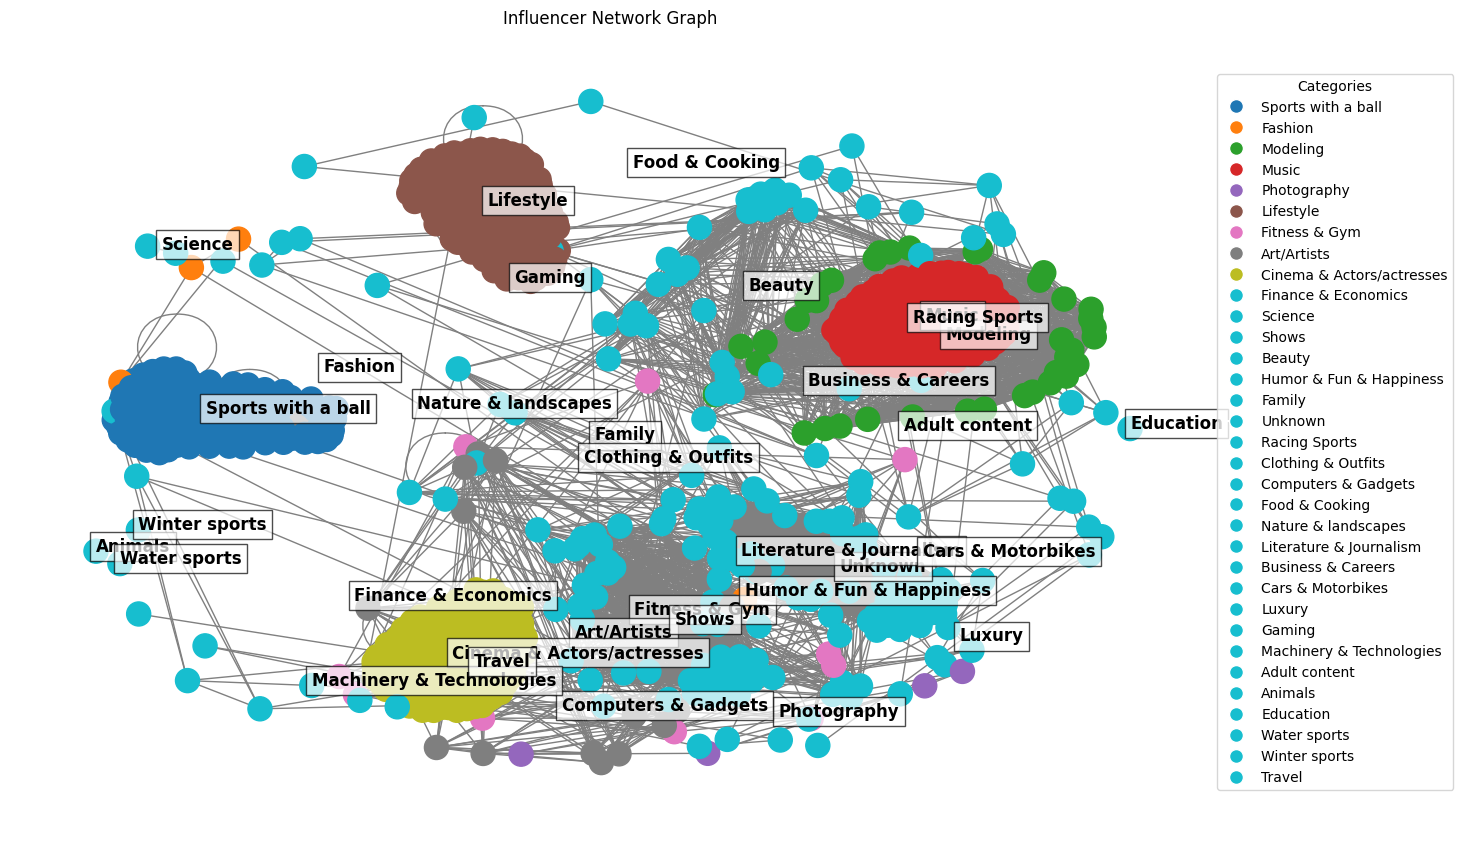

In [ ]:
# Convert to DataFrame:Helps in data manipulation (filtering, grouping, etc)
ig = pd.DataFrame(ig)

#Create Graph
G = nx.Graph()

# Assign distinct colors to categories
categories = ig['Category_1'].unique()
category_color_map = {category: plt.cm.tab10(i) for i, category in enumerate(categories)}

# Add nodes with category attribute
# Loops through each row in the dataset.
# Adds an influencer (node) to the graph with:
# name as the node ID.
# category as an attribute.
for _, row in ig.iterrows():
    G.add_node(row['name'], category=row['Category_1'])

#Connecting nodes based on categories (assumption: same category = likely connection)
for category in categories:
    # Get all influencers in this category
    nodes = ig[ig['Category_1'] == category]['name'].tolist()
    for i in range(len(nodes)): # Loop through each influencer
        for j in range(i + 1, len(nodes)): # Create pairwise connections
            G.add_edge(nodes[i], nodes[j])  # Add an edge between two influencers


# Assign colors based on category
node_colors = [category_color_map[G.nodes[node]['category']] for node in G.nodes()]
# Positioning & Visualization
plt.figure(figsize=(12, 8))
# Compute node positions using spring layout
pos = nx.spring_layout(G, k=0.5)

# Draw network
nx.draw(G, pos, node_color=node_colors, with_labels=False, node_size=300, edge_color="gray")

# Draw cluster names at their average position
for category in categories:
    category_nodes = [node for node in G.nodes() if G.nodes[node]['category'] == category]
    if category_nodes:
        avg_x = sum(pos[node][0] for node in category_nodes) / len(category_nodes)
        avg_y = sum(pos[node][1] for node in category_nodes) / len(category_nodes)
        # Places the category name at the center of the cluster.
        plt.text(avg_x, avg_y, category, fontsize=12, fontweight="bold", bbox=dict(facecolor="white", alpha=0.7))

# Add Legend
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', markersize=10,
                              markerfacecolor=category_color_map[category]) for category in categories]
# places the legend outside the graph:
plt.legend(legend_patches, categories, loc="center left", bbox_to_anchor=(1, 0.5), title="Categories")

plt.title("Influencer Network Graph")
plt.show()

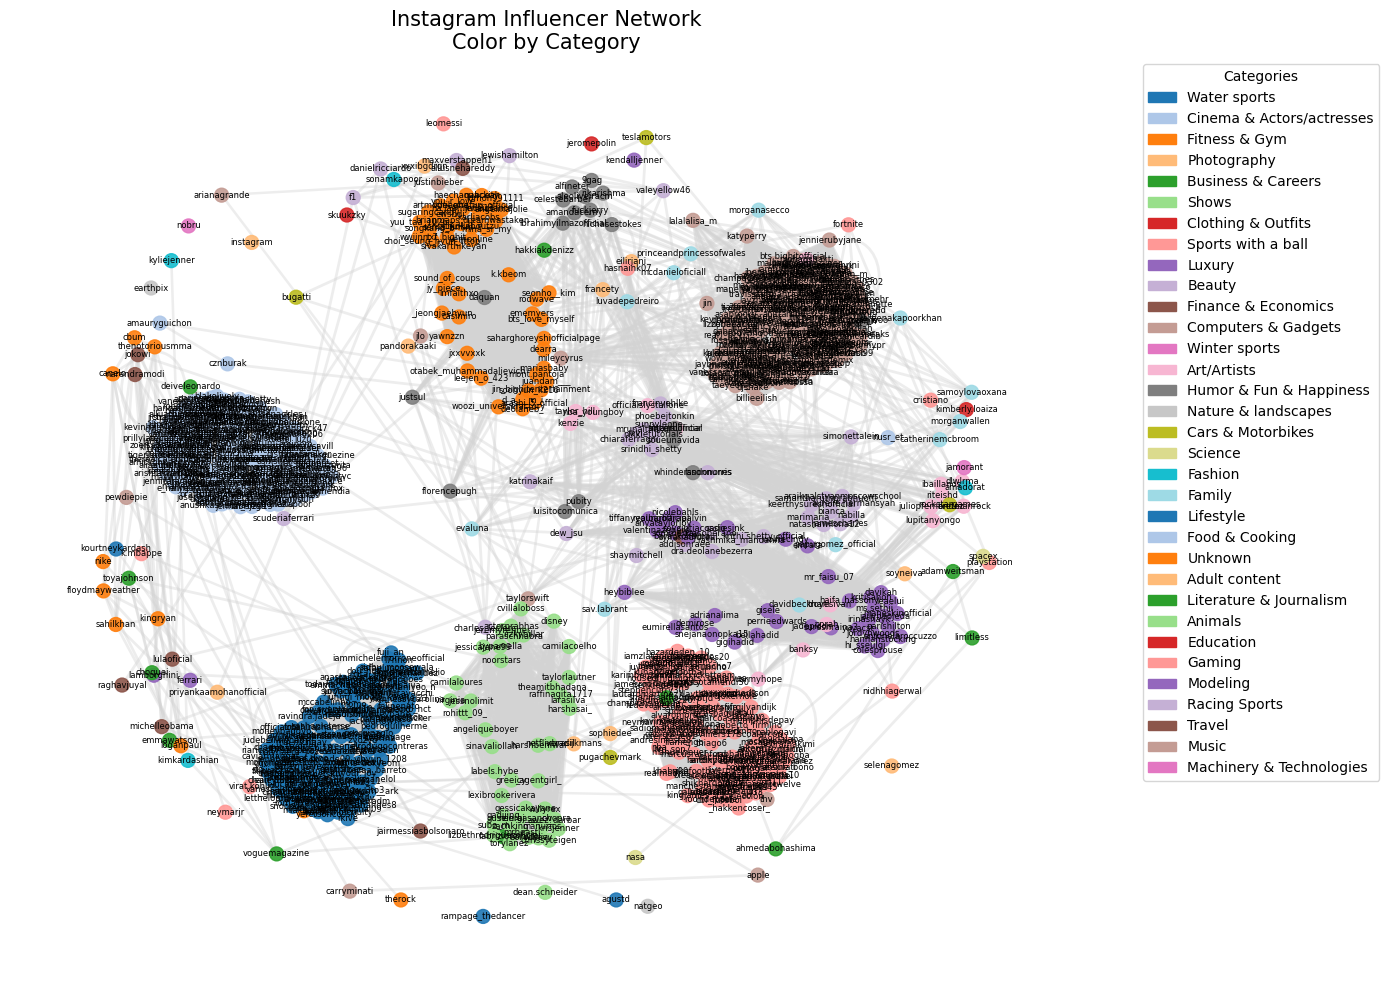

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from itertools import combinations
import matplotlib.patches as mpatches

# Basic preprocessing
ig = ig[['name', 'followers', 'Eng. (Avg.)', 'Eng. (Auth.)', 'Category_1']]
ig = ig.dropna()
ig = ig[ig['Category_1'].notnull()]
ig = ig.head(1000)

# Normalize
scaler = MinMaxScaler()
ig[['followers', 'Eng. (Avg.)']] = scaler.fit_transform(ig[['followers', 'Eng. (Avg.)']])

# Create graph
G = nx.Graph()
for _, row in ig.iterrows():
    G.add_node(row['name'], category=row['Category_1'], followers=row['followers'], engagement=row['Eng. (Avg.)'])

# Add edges
for (i, row1), (j, row2) in combinations(ig.iterrows(), 2):
    if row1['Category_1'] == row2['Category_1']:
        follower_sim = 1 - abs(row1['followers'] - row2['followers'])
        engagement_sim = 1 - abs(row1['Eng. (Avg.)'] - row2['Eng. (Avg.)'])
        weight = (follower_sim + engagement_sim) / 2
        if weight > 0.85:
            G.add_edge(row1['name'], row2['name'], weight=round(weight, 2))

# Unique categories and color mapping
categories = list(set(nx.get_node_attributes(G, 'category').values()))
colors = plt.cm.tab20.colors  # Up to 20 unique colors
category_color_map = {cat: colors[i % len(colors)] for i, cat in enumerate(categories)}

# Assign colors to nodes
node_colors = [category_color_map[G.nodes[n]['category']] for n in G.nodes()]

# Draw graph
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)
edges = G.edges(data=True)

nx.draw_networkx_nodes(G, pos, node_size=100, node_color=node_colors, alpha=0.9)
nx.draw_networkx_edges(
    G, pos,
    width=[d['weight']*2 for (_, _, d) in edges],
    edge_color='lightgray',  # Or use '#cccccc' or any light hex color
    alpha=0.4  # Increase or decrease for lighter/darker appearance
)
nx.draw_networkx_labels(G, pos, font_size=6)

# Create legend patches
legend_handles = [mpatches.Patch(color=color, label=cat) for cat, color in category_color_map.items()]
plt.legend(handles=legend_handles, title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Instagram Influencer Network\nColor by Category", fontsize=15)
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
for n in G.nodes():
    G.nodes[n]['influence'] = 0.6 * G.nodes[n].get('engagement', 0) + 0.4 * G.nodes[n].get('followers', 0)


In [ ]:
def print_top_influencers_by_influence(G, top_n=10):
    influence_scores = {n: G.nodes[n]['influence'] for n in G.nodes}
    top = sorted(influence_scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
    print("\nTop 10 Influencers by Custom Influence Score:")
    for rank, (node, score) in enumerate(top, 1):
        print(f"{rank}. Node {node} - Influence: {score:.2f}")
print_top_influencers_by_influence(G)


Top 10 Influencers by Custom Influence Score:
1. Node leomessi - Influence: 0.88
2. Node cristiano - Influence: 0.74
3. Node instagram - Influence: 0.41
4. Node neymarjr - Influence: 0.38
5. Node kyliejenner - Influence: 0.37
6. Node thv - Influence: 0.34
7. Node selenagomez - Influence: 0.33
8. Node arianagrande - Influence: 0.32
9. Node kendalljenner - Influence: 0.31
10. Node kimkardashian - Influence: 0.30


In [ ]:
# Compute Centrality Measures
degree_centrality = nx.degree_centrality(G)  # Direct connections
closeness_centrality = nx.closeness_centrality(G)  # Influence reach
betweenness_centrality = nx.betweenness_centrality(G)  # Control over information flow
eigenvector_centrality = nx.eigenvector_centrality(G)  # Importance in the network

# Function to print top 10 nodes for a given centrality measure
def print_top_influencers(centrality_dict, centrality_name):
    top_influencers = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:10]
    print(f"\nTop 10 Influencers by {centrality_name}:")
    for rank, (node, value) in enumerate(top_influencers, start=1):
        print(f"{rank}. Node {node} - {centrality_name}: {value:.4f}")

# Print results for each centrality measure
print_top_influencers(degree_centrality, "Degree Centrality")
print_top_influencers(closeness_centrality, "Closeness Centrality")
print_top_influencers(betweenness_centrality, "Betweenness Centrality")
print_top_influencers(eigenvector_centrality, "Eigenvector Centrality")



Top 10 Influencers by Degree Centrality:
1. Node maluma - Degree Centrality: 0.2273
2. Node champagnepapi - Degree Centrality: 0.2263
3. Node dualipa - Degree Centrality: 0.2263
4. Node shakira - Degree Centrality: 0.2263
5. Node theweeknd - Degree Centrality: 0.2263
6. Node blackpinkofficial - Degree Centrality: 0.2263
7. Node lelepons - Degree Centrality: 0.2263
8. Node nehakakkar - Degree Centrality: 0.2263
9. Node camila_cabello - Degree Centrality: 0.2263
10. Node frenchmontana - Degree Centrality: 0.2263

Top 10 Influencers by Closeness Centrality:
1. Node champagnepapi - Closeness Centrality: 0.2264
2. Node maluma - Closeness Centrality: 0.2264
3. Node dualipa - Closeness Centrality: 0.2254
4. Node shakira - Closeness Centrality: 0.2254
5. Node theweeknd - Closeness Centrality: 0.2254
6. Node blackpinkofficial - Closeness Centrality: 0.2254
7. Node lelepons - Closeness Centrality: 0.2254
8. Node nehakakkar - Closeness Centrality: 0.2254
9. Node camila_cabello - Closeness Centra

In [ ]:
from networkx.algorithms.community import girvan_newman
import itertools

# Run Girvan-Newman
communities_generator = girvan_newman(G)

# Select the level of split (e.g., split into 4 communities)
top_level_communities = next(itertools.islice(communities_generator, 3, 4))
communities = [list(c) for c in top_level_communities]

# Print and visualize each community separately
for idx, community_nodes in enumerate(communities, start=1):
    subgraph = G.subgraph(community_nodes)

    # Plot each community
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(subgraph, seed=42)

    nx.draw(subgraph, pos,
            with_labels=True,
            node_size=120,
            node_color='skyblue',
            edge_color='gray',
            font_size=7)

    plt.title(f"Community {idx} - {len(community_nodes)} Influencers", fontsize=14)
    plt.axis('off')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Assuming 'communities' is a list of node lists as detected before
community_stats = []

for idx, community_nodes in enumerate(communities, start=1):
    follower_sum = 0
    engagement_sum = 0
    count = 0

    for node in community_nodes:
        data = G.nodes[node]
        follower_sum += data['followers']
        engagement_sum += data['engagement']
        count += 1

    avg_followers = follower_sum / count
    avg_engagement = engagement_sum / count

    community_stats.append({
        'Community': idx,
        'Size': count,
        'Avg Followers': round(avg_followers, 4),
        'Avg Engagement': round(avg_engagement, 4)
    })

# Display results
import pandas as pd

df_community_stats = pd.DataFrame(community_stats)
print(df_community_stats)

    Community  Size  Avg Followers  Avg Engagement
0           1     1         0.7057          1.0000
1           2     1         0.9017          0.6277
2           3     2         0.2466          0.3816
3           4     2         0.6140          0.1462
4           5     1         0.4602          0.2125
5           6     1         0.5950          0.1440
6           7     1         0.6288          0.1226
7           8   229         0.0456          0.0362
8           9   129         0.0455          0.0275
9          10     1         0.3521          0.0841
10         11     1         0.0679          0.4051
11         12     2         0.5221          0.0210
12         13     1         1.0000          0.0185
13         14    16         0.0268          0.0446
14         15   196         0.0404          0.0298
15         16   147         0.0157          0.0340
16         17    38         0.0321          0.0274
17         18     6         0.0671          0.0292
18         19     2         0.0

Dropdown(description='Community:', index=14, options=(('Community 1', 0), ('Community 2', 1), ('Community 3', …

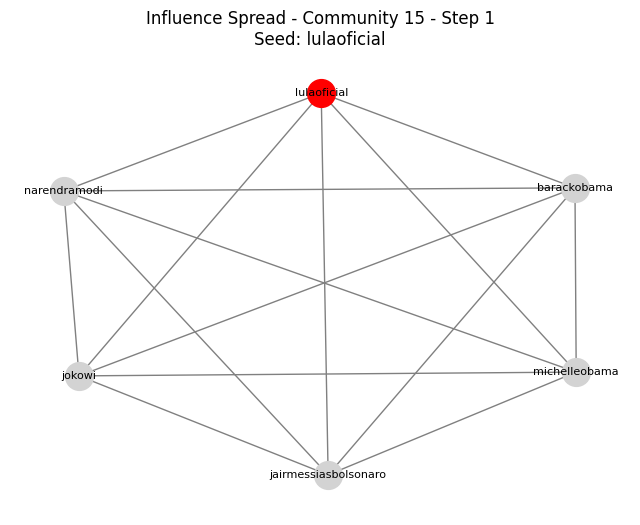

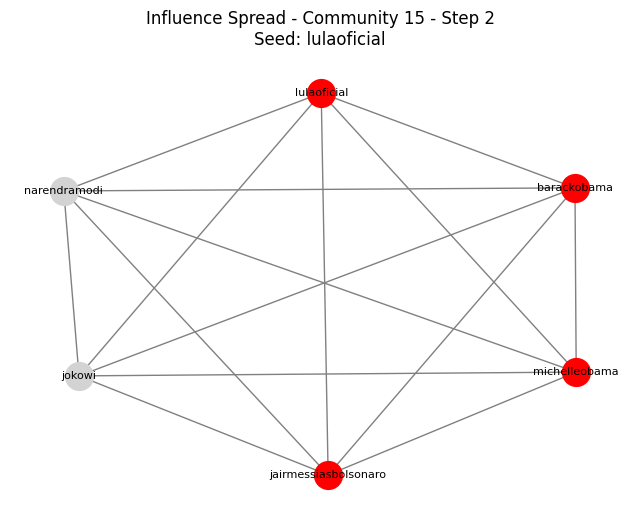

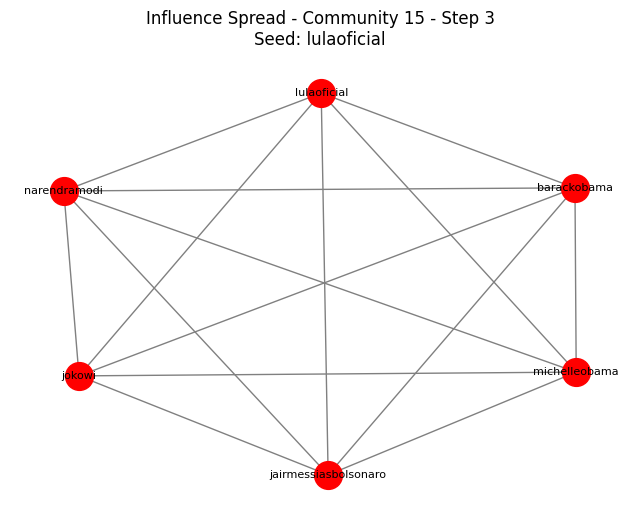

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import random
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# ✅ Define community_list from the previously computed communities
community_list = communities  # this line fixes the NameError

# Create dropdown options from community list
community_dropdown = widgets.Dropdown(
    options=[(f'Community {i+1}', i) for i in range(len(community_list))],
    description='Community:',
    disabled=False,
)

# Independent Cascade function
def independent_cascade(G, initial_nodes, prob=0.3, seed=42):
    random.seed(seed)
    activated = set(initial_nodes)
    newly_activated = set(initial_nodes)
    steps = [list(activated)]

    while newly_activated:
        next_activated = set()
        for node in newly_activated:
            for neighbor in G.neighbors(node):
                if neighbor not in activated:
                    if random.random() < prob:
                        activated.add(neighbor)
                        next_activated.add(neighbor)
        newly_activated = next_activated
        if newly_activated:
            steps.append(list(newly_activated))
    return activated, steps

# Function to visualize influence propagation in the selected community
def show_influence_simulation(community_index):
    community_nodes = community_list[community_index]
    subG = G.subgraph(community_nodes).copy()

    # ✅ Choose most influential node (highest centrality) as seed
    centrality = nx.degree_centrality(subG)  # you can swap this with betweenness, etc.
    seed_node = max(centrality, key=centrality.get)

    final_activated, activation_steps = independent_cascade(subG, [seed_node], prob=0.3)
    pos = nx.spring_layout(subG, seed=42)
    all_nodes = set(subG.nodes())

    for step_num, step_nodes in enumerate(activation_steps):
        plt.figure(figsize=(8, 6))
        active_nodes = set(itertools.chain.from_iterable(activation_steps[:step_num+1]))
        inactive_nodes = all_nodes - active_nodes

        nx.draw_networkx_nodes(subG, pos, nodelist=list(inactive_nodes), node_color="lightgray", node_size=400)
        nx.draw_networkx_nodes(subG, pos, nodelist=list(active_nodes), node_color="red", node_size=400)
        nx.draw_networkx_edges(subG, pos, edge_color="gray")
        nx.draw_networkx_labels(subG, pos, font_size=8)

        plt.title(f"Influence Spread - Community {community_index+1} - Step {step_num+1}\nSeed: {seed_node}")
        plt.axis('off')
        plt.show()

# Handle dropdown change event
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output(wait=True)
        display(community_dropdown)
        show_influence_simulation(change['new'])

# Attach handler and display widget
community_dropdown.observe(on_change)
display(community_dropdown)


In [ ]:
def evaluate_performance(subG, final_activated, activation_steps, seed_node):
    influence_spread = len(final_activated)
    influence_fraction = influence_spread / subG.number_of_nodes()

    num_steps = len(activation_steps)
    avg_activated_per_step = sum(len(step) for step in activation_steps) / num_steps

    early_steps = 2
    early_activated = sum(len(activation_steps[i]) for i in range(min(early_steps, num_steps)))
    early_fraction = early_activated / influence_spread if influence_spread else 0

    seed_efficiency = influence_spread / len([seed_node])  # just 1 seed

    print(f"\nInfluence Spread: {influence_spread} nodes ({influence_fraction:.2%}) of community")
    print(f"Steps until saturation: {num_steps}")
    print(f"Average Activation per Step: {avg_activated_per_step:.2f}")
    print(f"Early Activation (first {early_steps} steps): {early_activated} nodes ({early_fraction:.2%})")
    print(f"Seed Efficiency: {seed_efficiency:.2f} nodes per seed\n")

In [ ]:
# Pick a community index
community_index = 7  # change this to any index like 1, 2, etc.

# Create subgraph
community_nodes = communities[community_index]
subG = G.subgraph(community_nodes).copy()

# Choose a seed node (highest degree centrality)
centrality = nx.degree_centrality(subG)
seed_node = max(centrality, key=centrality.get)

# Run IC model
final_activated, activation_steps = independent_cascade(subG, [seed_node], prob=0.3)

# Evaluate performance
evaluate_performance(subG, final_activated, activation_steps, seed_node)


Influence Spread: 229 nodes (100.00%) of community
Steps until saturation: 5
Average Activation per Step: 45.80
Early Activation (first 2 steps): 78 nodes (34.06%)
Seed Efficiency: 229.00 nodes per seed



In [ ]:
# Compute Global Clustering Coefficient (Average Clustering)
global_clustering_coefficient = nx.average_clustering(G)
print(f"Global Clustering Coefficient: {global_clustering_coefficient}")

Global Clustering Coefficient: 0.9632431705591155


In [ ]:
# Compute Local Clustering Coefficient for each node
local_clustering_coefficients = nx.clustering(G)

# Display top 10 nodes with highest local clustering coefficients
top_local_clustering = sorted(local_clustering_coefficients.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Nodes by Local Clustering Coefficient:")
for node, coef in top_local_clustering:
    print(f"Node {node} - Local Clustering Coefficient: {coef}")

Top 10 Nodes by Local Clustering Coefficient:
Node arianagrande - Local Clustering Coefficient: 1.0
Node thv - Local Clustering Coefficient: 1.0
Node virat.kohli - Local Clustering Coefficient: 1.0
Node uarmyhope - Local Clustering Coefficient: 1.0
Node dlwlrma - Local Clustering Coefficient: 1.0
Node jennaortega - Local Clustering Coefficient: 1.0
Node noahschnapp - Local Clustering Coefficient: 1.0
Node antonelaroccuzzo - Local Clustering Coefficient: 1.0
Node narendramodi - Local Clustering Coefficient: 1.0
Node georginagio - Local Clustering Coefficient: 1.0


In [ ]:
from networkx.algorithms.community import girvan_newman, modularity

# Run the Girvan-Newman algorithm
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)  # Extract first community split
community_list = [list(community) for community in top_level_communities]  # Convert to list of lists

# Compute modularity
modularity_score = modularity(G, top_level_communities)

# Print modularity result
print(f"Modularity Score: {modularity_score:.4f}")  # Rounded to 4 decimal places


Modularity Score: 0.7383


In [33]:
import nbformat

# Load the notebook
notebook_path = "/content/drive/MyDrive/Colab Notebooks/sna_influence_propagation.ipynb"
with open(notebook_path, 'r') as file:
    notebook_content = nbformat.read(file, as_version=4)

# Print the metadata
print(notebook_content['metadata'])


{'colab': {'provenance': [], 'mount_file_id': '1O6FGCn0MlJowAxCLUlJXtbFuJNwijDsc', 'authorship_tag': 'ABX9TyOb9+Cc+JP2zPBLM8Jvb6L7'}, 'kernelspec': {'display_name': 'Python 3', 'name': 'python3'}, 'language_info': {'name': 'python'}, 'widgets': {'application/vnd.jupyter.widget-state+json': {'b7810818d7934c45bc537ca233b6da2e': {'model_module': '@jupyter-widgets/controls', 'model_name': 'DropdownModel', 'model_module_version': '1.5.0', 'state': {'_dom_classes': [], '_model_module': '@jupyter-widgets/controls', '_model_module_version': '1.5.0', '_model_name': 'DropdownModel', '_options_labels': ['Community 1', 'Community 2', 'Community 3', 'Community 4', 'Community 5', 'Community 6', 'Community 7', 'Community 8', 'Community 9', 'Community 10', 'Community 11', 'Community 12', 'Community 13', 'Community 14', 'Community 15', 'Community 16', 'Community 17', 'Community 18', 'Community 19', 'Community 20', 'Community 21', 'Community 22', 'Community 23', 'Community 24', 'Community 25', 'Communit

In [34]:
# Add state to the widgets metadata if it is missing
for cell in notebook_content['cells']:
    if 'metadata' in cell and 'widgets' in cell['metadata']:
        if 'state' not in cell['metadata']['widgets']:
            cell['metadata']['widgets']['state'] = {}

# Save the modified notebook
with open('/content/drive/MyDrive/Colab Notebooks/fixed_sna_influence_propagation.ipynb', 'w') as file:
    nbformat.write(notebook_content, file)


**PUSH TO GITHUB**

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
!git clone https://github.com/yeshilhazomVIT/Influence-Propagation-in-Marketing.git

Cloning into 'Influence-Propagation-in-Marketing'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 1.12 MiB | 14.71 MiB/s, done.


In [27]:
!git config --global user.name "yeshilhazomVIT"
!git config --global user.email "yeshi.lhazom2024@vitstudent.ac.in"

In [28]:
!cp "/content/drive/MyDrive/Colab Notebooks/sna_influence_propagation.ipynb" "/content/Influence-Propagation-in-Marketing/"

In [29]:
%cd /content/Influence-Propagation-in-Marketing
!git add sna_influence_propagation.ipynb

/content/Influence-Propagation-in-Marketing


In [30]:
!git commit -m "Updated the influence propagation notebook"

[main bf94998] Updated the influence propagation notebook
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite sna_influence_propagation.ipynb (75%)


In [31]:
!git push origin main

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 1.55 MiB | 4.53 MiB/s, done.
Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/yeshilhazomVIT/Influence-Propagation-in-Marketing.git
   b9e4af6..bf94998  main -> main


In [14]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
